In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "Vx7hZtK33csrtkim9K08oGoHM"
Consumer_Secret_Key = "U6vifaTOGQaEqppk9QP986QrHlrXdYYxCkxVBV3mTSihjuTftR"
Access_Token = "1137001755428810752-8QdkP3W4Z93EGEdLPRIEGL0MbUNnMC"
Access_Token_Secret = "Zwz5IZzr5zFuiPtviPASDkyuNsf9KZe8HTfmAuwN4ZZ2K"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [23]:
posts = api.user_timeline(screen_name = "Bukalapak", count = 500, tweet_mode = "extended")

print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(1)+')'+ tweet.full_text+ '\n')
  i=i+1

Show the 5 recent tweets:

1)@AviaTeens Baik kak, mohon menunggu ya, kendala kamu sedang kami maksimalkan ya, jangan lupa cek emailmu secara berkala ya :) ^IJH

1)@andreesquad Hai kak, maaf ya udah bikin kakak jadi nggak nyaman. Perihal kendala kakak saat ini sudah Bella bantu penanganan lebih lanjut ya kak, mohon kesediaannya kakak untuk cek email kakak secara berkala ya :) ^MDS

1)@zeabigwin Hai kak, maaf atas kendalanya, yuk infokan ke DM agar mimin bantu cek kendalamu, ditunggu ya kak :) ^IJH

1)@Wildan50069050 Asek semangat banget nih kakaknya. Yuk pantenting terus ya kak. Semangat terus kakak 😊😊 ^MDS

1)@Wildan50069050 Aamiin kak. Pantengin terus ya kak jangan sampe kelawatan pokoknya 🤭😁 ^SW



In [24]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"@AviaTeens Baik kak, mohon menunggu ya, kendal..."
1,"@andreesquad Hai kak, maaf ya udah bikin kakak..."
2,"@zeabigwin Hai kak, maaf atas kendalanya, yuk ..."
3,@Wildan50069050 Asek semangat banget nih kakak...
4,@Wildan50069050 Aamiin kak. Pantengin terus ya...


In [25]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\s+', '', text)
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"Baik kak, mohon menunggu ya, kendala kamu sed..."
1,"Hai kak, maaf ya udah bikin kakak jadi nggak ..."
2,"Hai kak, maaf atas kendalanya, yuk infokan ke..."
3,Asek semangat banget nih kakaknya. Yuk panten...
4,Aamiin kak. Pantengin terus ya kak jangan sam...
...,...
195,Kakak juga keren nih pastinya. Semangat ya Ka...
196,Maaf banget nih kak sebelumnya bisa diinfokan...
197,@_tear_dragon Wah pilihan yang tepat ini Kak. ...
198,"Aamiin aamiin, Bella bantu aminin ya Kak. Sem..."


In [26]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,subjectivity,Polarity
0,"Baik kak, mohon menunggu ya, kendala kamu sed...",1.00,0.500000
1,"Hai kak, maaf ya udah bikin kakak jadi nggak ...",1.00,0.500000
2,"Hai kak, maaf atas kendalanya, yuk infokan ke...",1.00,0.500000
3,Asek semangat banget nih kakaknya. Yuk panten...,0.00,0.000000
4,Aamiin kak. Pantengin terus ya kak jangan sam...,0.00,0.000000
...,...,...,...
195,Kakak juga keren nih pastinya. Semangat ya Ka...,1.00,0.500000
196,Maaf banget nih kak sebelumnya bisa diinfokan...,1.00,0.500000
197,@_tear_dragon Wah pilihan yang tepat ini Kak. ...,1.00,0.500000
198,"Aamiin aamiin, Bella bantu aminin ya Kak. Sem...",0.00,0.000000


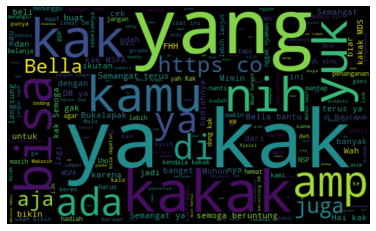

In [27]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,subjectivity,Polarity,Analysis
0,"Baik kak, mohon menunggu ya, kendala kamu sed...",1.00,0.500000,positive
1,"Hai kak, maaf ya udah bikin kakak jadi nggak ...",1.00,0.500000,positive
2,"Hai kak, maaf atas kendalanya, yuk infokan ke...",1.00,0.500000,positive
3,Asek semangat banget nih kakaknya. Yuk panten...,0.00,0.000000,neutral
4,Aamiin kak. Pantengin terus ya kak jangan sam...,0.00,0.000000,neutral
...,...,...,...,...
195,Kakak juga keren nih pastinya. Semangat ya Ka...,1.00,0.500000,positive
196,Maaf banget nih kak sebelumnya bisa diinfokan...,1.00,0.500000,positive
197,@_tear_dragon Wah pilihan yang tepat ini Kak. ...,1.00,0.500000,positive
198,"Aamiin aamiin, Bella bantu aminin ya Kak. Sem...",0.00,0.000000,neutral


In [30]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1)  Hi Kak, duh maaf atas kendalanya. Perihal kendala pengiriman BukaSend 210017675813BPT yuk pindah DM karena Bella mau nginfoin sesuatu yang nggak bisa sampein disini nih Kak. ^MA

2) Yeaaay udah rame, langsung aja nih jawab dengan "Wrong Answer Only" versi kamu!

S &amp; K:
✔️ Mention 3 temen
✔️ Follow 
✔️ &amp; Like postingan ini
✔️ Jawaban + HarBOBOLnas1212

Yang paling bisa bikin Mimin ketawa dialah pemenangnya 😄 https://t.co/travFnSHCP

3) Buat siapapun boleh ko, nih caranya: 

1. Reply pakai screenshot chicken dinner kamu!
2. Follow  &amp; Instagram _id
3. Tulis user ID PUBGM, username Bukalapak + PUBGxBukalapak
4. Mention 3 teman 
5. Hadiah voucher untuk di redeem via chat Bukalapak/DM Twitter



In [31]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1)  Baik kak, mohon menunggu ya, kendala kamu sedang kami maksimalkan ya, jangan lupa cek emailmu secara berkala ya :) ^IJH

2)  Hai kak, maaf ya udah bikin kakak jadi nggak nyaman. Perihal kendala kakak saat ini sudah Bella bantu penanganan lebih lanjut ya kak, mohon kesediaannya kakak untuk cek email kakak secara berkala ya :) ^MDS

3)  Hai kak, maaf atas kendalanya, yuk infokan ke DM agar mimin bantu cek kendalamu, ditunggu ya kak :) ^IJH

4)  Hai kak, semoga beruntung ya, jangan lupa berdoa ya kak :) ^IJH

5) _dmwn Hai kka, duh maaf ya udah bikin kakak nggak nyaman. Yuk perihal kendala kakak bisa informasikan ke kami melalui DM ya kak, agar dibantu cek lebih lanjut :) ^MDS

6)  Hai kak. Mohon maaf kendalanya bikin nggak nyaman. Mengenai kendala yang terjadi, mohon sampaikan detail kendalanya lewat DM ya agar bisa Bella bantu penanganan lebih lanjut. :) ^FHH

7)  Mantulllsss, jangan lupa ceki ceki lagi s&amp;knya ya kak biar kesempatan untuk menangnya semakin besar

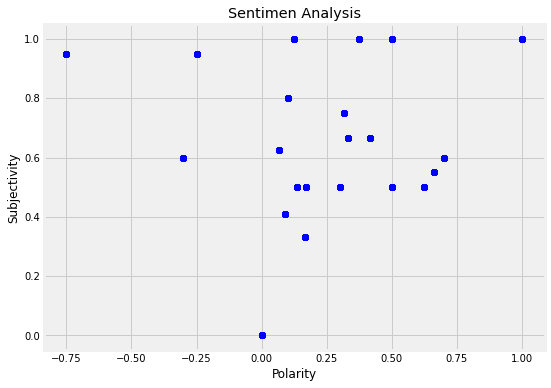

In [32]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'], df['subjectivity'], color='b')

plt.title('Sentimen Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [33]:
potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

36.5

In [34]:
netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

1.5

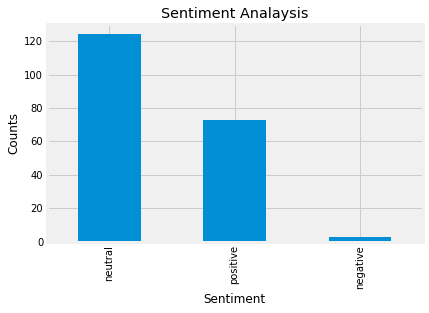

In [35]:
df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()